In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

/Users/skyemalfoy/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In thhis exercise, we will use a **marketing campaing dataset**.<br>
This dataset has been saved in a CSV file and have been provided with this notebook.<br>

A **metadata file (.txt)** has also been provided: it contains all the information about the dataset's features.

# Load dataset & first analysis

The Pandas libraries allows to extract the CSV files into tables (Dataframe) by using the `read_csv()` function.<br>

To quickly show the content of a dataset, you can use the `.head()` method on your dataframe. This function shows the first lines of the table. You can also use the `.tail()` function that shows the last lines of the table.
These two functions only have a paramater named **n** that controls the number of lines displayed.

**<font color='blue'>1. Load the dataset and show its content.**

In [2]:
df = pd.read_csv('marketing_campaign - marketing_campaign.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


The `.info()` method can be used on a dataframe to get a resume of its variables, length and missing values. This method has some parameters such as the **show_counts** parameter that can be either True or False, if True the method returns the number of non-missing values in the dataset.

**<font color='blue'>2. Show a resume of the dataset variables, length and missing values.<br> Do you understand each variable name ?<br> Is there any missing variable ?**

In [3]:
#Column 5(kidhome) has 24 rows of missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

To open a text file, you can use the `open()` function from Python.<br>
Here is a [tutorial](https://www.geeksforgeeks.org/python-open-function/) to use the open function.

**<font color='blue'>3. Open the metadata text file to see the description of the columns. Could you group these variables into categories ?**

In [4]:
description_metadata = open('marketing_campaign_metadata.txt', 'r')
for lines in description_metadata:
    print(lines, end = '')

﻿ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise
MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campa

The ID column is the Customer's unique identifier. <br>Thus, we can check if there is any duplicate in our data. You can use the `.duplicated()` method on the dataframe.

The `.duplicated()` method has several parameters:

*   **subset**: This parameter specifies the column or columns to use for identifying duplicates. By default, all columns are used, but you can specify a subset of columns using a list of column names or column index positions.

*   **keep**: This parameter specifies which duplicates, if any, to mark as True. By default, the first occurrence of a row is marked as False, and subsequent occurrences are marked as True. Setting keep to 'first' or False produces the same result. Setting keep to 'last' marks the last occurrence of a row as False and all previous occurrences as True.

`.duplicated()` [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)

**<font color='blue'>4. Is there any duplicates on the ID column ?**

In [5]:
# res_duplicate = df.duplicated('ID', keep = False).values
# for result in res_duplicate:
#     if result == True:
#         print('It has duplicated values')
#         break
#So there are no duplicated values.


#Another method - use any()
df.duplicated('ID').any()

False

# Analysis of the features

The Year_Birth feature is the customer's birth year.<br>
Let's analyse it.

First, you can analyse the summary statistics of this feature.<br> To do so, you can use the `.describe()` that will automatically compute the mean, the standard deviation, the min value, the quartiles and the max value.

**<font color='blue'>1. Compute the summary statistics on the Year_Birth feature using the `describe()` method.<br>What can you say about these figures ?**

In [6]:
#People born in similar year.
des_of_yb = df['Year_Birth'].describe()
des_of_yb

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

It is generally better to visualize the data as it provides a more intuitive and insightful understanding of the underlying patterns, trends, and relationships in the data. 

For numerical values, a typical graph is the histogram. <br>There are many ways to create graphs in Python including:


*   Matploblib
*   Seaborn
*   Pandas

**<font color='blue'>2. Create an histogram of the Year_Birth feature values.<br>What can you tell about this feature ?**

(array([  3.,   0.,   0.,   0.,  16., 300., 541., 685., 506., 189.]),
 array([1893. , 1903.3, 1913.6, 1923.9, 1934.2, 1944.5, 1954.8, 1965.1,
        1975.4, 1985.7, 1996. ]),
 <BarContainer object of 10 artists>)

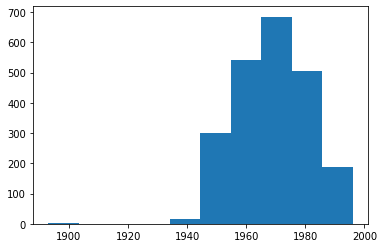

In [7]:
#There are more people who was born around 1970 and nearly nobody born before 1940.
plt.hist(df['Year_Birth'], bins = 10)

**<font color='blue'>3. Display an histogram of the Income feature.**

(1065.063, 96720.857]       2199
(96720.857, 191711.714]       16
(571675.143, 666666.0]         1
(191711.714, 286702.571]       0
(286702.571, 381693.429]       0
(381693.429, 476684.286]       0
(476684.286, 571675.143]       0
Name: Income, dtype: int64

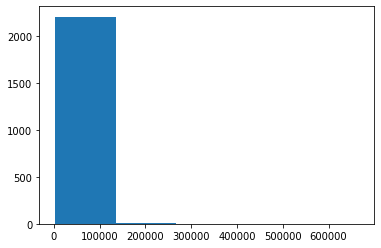

In [8]:
#We can easily say that nearly all people have the salary between 0-100,000
plt.hist(df['Income'], bins = 5)
df['Income'].value_counts(bins = 7)

Histograms are not the only type of graph that can be used with numerical data.<br> You can also create Boxplot by using the `.boxplot()` method from the Pandas library.

**<font color='blue'>4. Create a boxplot of the Income feature. <br>Is this graph telling you the same story as the histogram ?**

<AxesSubplot:>

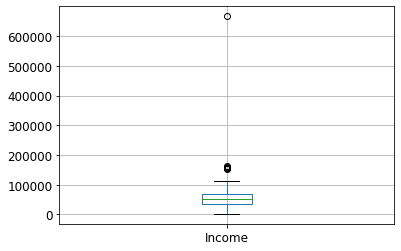

In [9]:
df.boxplot(column = 'Income', fontsize = 12)

Next, let's analyse a categorical data : the Education feature.

The Education feature categories can be counted using the `.value_counts()` method of the dataframe.

**<font color='blue'>5. Find the frequencies of each category of the Education feature.**

In [10]:
counts_edu = df.value_counts(df['Education'])
counts_edu
#use normalize = True to show the persentage for each value.
df.value_counts(df['Education'], normalize=True)

Education
Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
dtype: float64

Bar plots can be used to visualize the frequencies.<br> To do so, you can use the `.plot.bar()` method on the result of the `value_counts()` method.

**<font color='blue'>6. Display a bar plot of the Education feature.<br>What can you tell about this feature ?**

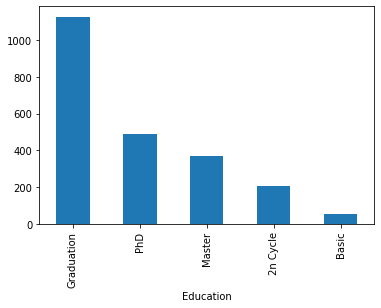

In [11]:
counts_edu.plot.bar()
plt.show()

**<font color='blue'>7. Do the exact same thing for the Marital_Status.**

<AxesSubplot:xlabel='Marital_Status'>

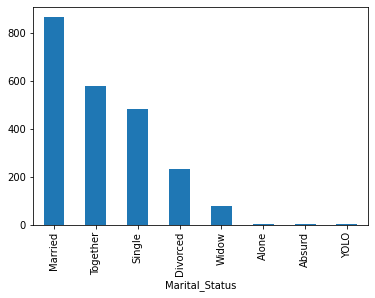

In [12]:
df.value_counts('Marital_Status').plot.bar()

The `Dt_Customer` feature contains **dates**.

Pandas provides several functions and tools to handle dates and time series data in a flexible and efficient manner. Here are some ways to handle dates using pandas:

*  **Converting Strings to Dates**: Pandas provides a to_datetime function that can be used to convert a string to a datetime object. For example, `pd.to_datetime('2023-01-01')` will return a datetime object representing the date "January 1st, 2023".

*  **Extracting Date Components**: Once a date is represented as a datetime object in pandas, we can extract various components of the date such as year, month, day, etc. using the dt accessor. For example, `df['Date'].dt.year` will return a Series object containing the year values for each date in the 'Date' column of the DataFrame df.

**<font color='blue'>8.a. Transform the string dates from the Dt_Customer column into datetime objects.**

In [35]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%Y-%m-%d')

In [38]:
print(df['Dt_Customer'])
type(df['Dt_Customer'])

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]


pandas.core.series.Series

**<font color='blue'>8.b. Extract the year from the transformed Dt_Customer column.**

In [14]:
years = df['Dt_Customer'].dt.year
years

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_Customer, Length: 2240, dtype: int64

**<font color='blue'>8.c Count the frequencies of each year and display a bar graph.**

<AxesSubplot:>

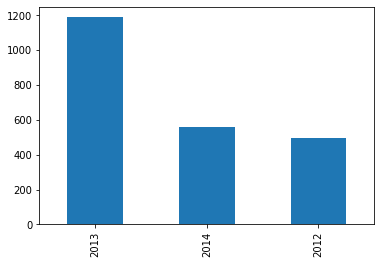

In [15]:
freq_year = years.value_counts()
freq_year.plot.bar()

The `Z_CostContact` and the Z_Revenue seem to have strange behaviours.

**<font color='blue'>9. Compute the statistics for these two features.<br>Comment the result and the utility of these features.**

In [16]:
#std (standard deviation) = 0 while the mean, min and max are all equal,
# It means the whole column has the same value. Meaningless...
df[['Z_CostContact', 'Z_Revenue']].describe()

,Z_CostContact,Z_Revenue
count,2240.0,2240.0
mean,3.0,11.0
std,0.0,0.0
min,3.0,11.0
25%,3.0,11.0
50%,3.0,11.0
75%,3.0,11.0
max,3.0,11.0


# Analysis of the label

Let's use the Response column as the label.

Analysis of the target variable is an important step in machine learning and data analysis because the target variable is the variable that we are trying to predict or explain. By understanding the characteristics of the target variable, we can better understand the nature of the problem we are trying to solve and the requirements for an effective predictive model.

**<font color='blue'>1.a. Is the target a numerical or a categorical variable ?<br>1.b. If numerical, analyze its statistics (mean, max, min, median, quantiles ...).<br> If categorical, analyze the number of categories and their respective counts.**

In [17]:
#1.a. A categorial variable (It has only two values: 0 and 1)
#1.b. It has two values. 0 for 1906 and 1 for 334
fre_res = df['Response'].value_counts()
fre_res

0    1906
1     334
Name: Response, dtype: int64

**<font color='blue'>2.If numerical, display an histogram of the values.<br>If categorical, display a bar graph of the values.**

<AxesSubplot:>

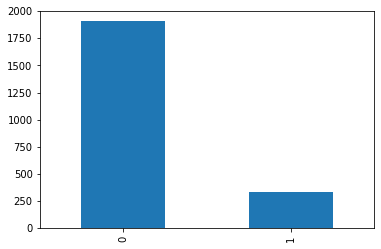

In [18]:
fre_res.plot.bar()

# Target-feature relationship

This type of analysis involves evaluating the statistical significance of the association between each individual feature and the target variable, without considering the relationships between different features in the dataset.

**<font color='blue'>1. Compare the histograms of the MntMeatProducts feature when the Response target is 0 and 1.<br> Comment the result.**

*Tips: For this question, you should create two histograms, one when Response is 0 and one when Response is 1.<br> Don't forget to keep the scales even i.e. the x-axis and the y-axis should be the same for both histograms.*

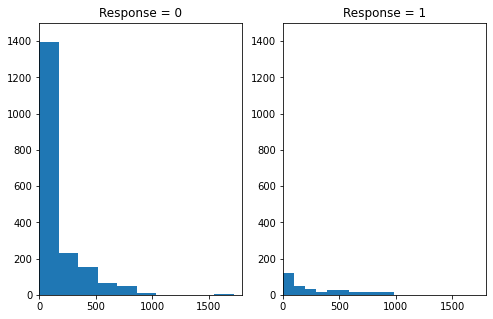

In [19]:
plt.figure(figsize = (8,5))
plt.subplot(1,2,1)
plt.title('Response = 0')
plt.xlim((0,1800))
plt.ylim((0,1500))
plt.hist(df['MntMeatProducts'][df['Response'] == 0])
plt.subplot(1,2,2)
plt.title('Response = 1')
plt.xlim((0,1800))
plt.ylim((0,1500))
plt.hist(df['MntMeatProducts'][df['Response'] == 1])
plt.show()

**<font color='blue'>2. Compare the bar plots of the AcceptedCmp5 feature when the Response target is 0 and 1.<br>Comment the result.**

*Tips: For this question, you should first count the values of AcceptedCmp5 for Reponse = 0 and Reponse = 1.<br> Then, you create two bar plots with the results.<br> It is a good idea to normalize the counts in order to compare the bar plots.*

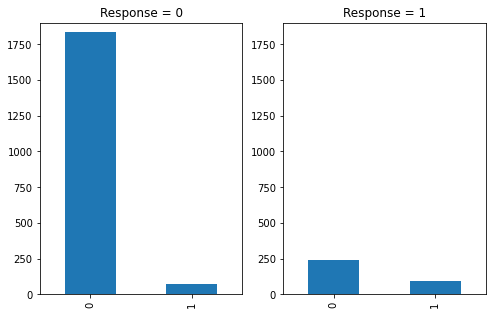

In [20]:
frq_AcC5_R0 = df['AcceptedCmp5'][df['Response'] == 0].value_counts()
frq_AcC5_R1 = df['AcceptedCmp5'][df['Response'] == 1].value_counts()

plt.figure(figsize = (8,5))
plt.subplot(1,2,1)
plt.title('Response = 0')
plt.ylim((0,1900))
frq_AcC5_R0.plot.bar()
plt.subplot(1,2,2)
plt.title('Response = 1')
plt.ylim((0,1900))
frq_AcC5_R1.plot.bar()
plt.show()

**<font color='blue'>3. Compare the bar plots of the Marital_Status feature when the Response target is 0 and 1.<br> Comment the result.**

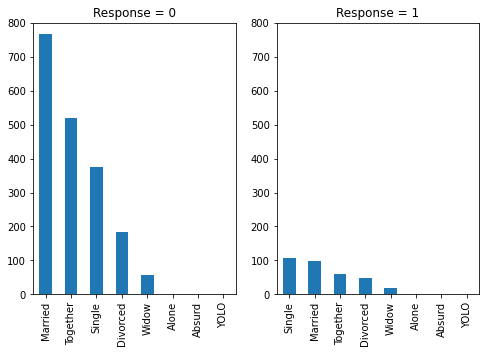

In [21]:
frq_MS_R0 = df['Marital_Status'][df['Response'] == 0].value_counts()
frq_MS_R1 = df['Marital_Status'][df['Response'] == 1].value_counts()

plt.figure(figsize = (8,5))
plt.subplot(1,2,1)
plt.title('Response = 0')
plt.ylim((0,800))
frq_MS_R0.plot.bar()
plt.subplot(1,2,2)
plt.title('Response = 1')
plt.ylim((0,800))
frq_MS_R1.plot.bar()
plt.show()

**<font color='blue'>4. Compute the correlation coefficient between the target and the features of the dataset.<br> Which features seem to be correlated to the target ?**

*Tips: You can use the `.corr()` function.<br>You must encode the categorical features (Education, Marital_Status, Dt_Customer) into numbers to compute the correlation coefficient.*

In [22]:
#Convert
df['Education'] = df['Education'].map({"Graduation": 0, "PhD": 1, "Master":2, "2n Cycle": 3, "Basic": 4})
df['Marital_Status'] = df['Marital_Status'].map({"Married": 0,"Together": 1,"Single": 2,"Divorced": 3,"Widow": 4,"Alone": 5,"YOLO": 6})

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   int64         
 3   Marital_Status       2238 non-null   float64       
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [57]:
#Covert Date
df['Dt_Customer']= df['Dt_Customer'].apply(lambda x: x.timestamp())
df['Dt_Customer']


0       1.333930e+09
1       1.407024e+09
2       1.377043e+09
3       1.412208e+09
4       1.390090e+09
            ...     
2235    1.371082e+09
2236    1.412554e+09
2237    1.390608e+09
2238    1.390522e+09
2239    1.350259e+09
Name: Dt_Customer, Length: 2240, dtype: float64

In [67]:
df.corr()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,-0.021126,-0.012603,0.013095,0.002406,-0.002580,0.004535,-0.046524,-0.022878,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,0.035502,-0.090934,-0.161791,0.230176,-0.352111,-0.028032,-0.019871,-0.157773,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Education,-0.021126,0.035502,1.000000,-0.015168,-0.117535,0.034961,-0.060603,-0.030495,-0.027619,-0.069143,...,0.047714,0.011963,-0.024276,-0.037413,-0.038975,-0.026042,-0.009267,NaN,NaN,-0.018925
Marital_Status,-0.012603,-0.090934,-0.015168,1.000000,0.014856,-0.043667,0.016457,-0.004424,0.005407,0.022783,...,-0.006438,0.009997,0.016341,-0.013530,-0.022480,0.021886,-0.004492,NaN,NaN,0.130329
Income,0.013095,-0.161791,-0.117535,0.014856,1.000000,-0.428669,0.019133,0.016712,-0.003970,0.578650,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,0.034961,-0.043667,-0.428669,1.000000,-0.036133,0.055907,0.008827,-0.496297,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,-0.060603,0.016457,0.019133,-0.036133,1.000000,-0.007130,0.016198,0.004846,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Dt_Customer,0.004535,-0.028032,-0.030495,-0.004424,0.016712,0.055907,-0.007130,1.000000,-0.030165,-0.147455,...,-0.251824,0.006700,-0.016015,0.024458,0.035947,-0.006050,-0.038988,NaN,NaN,-0.174061
Recency,-0.046524,-0.019871,-0.027619,0.005407,-0.003970,0.008827,0.016198,-0.030165,1.000000,0.016064,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,-0.069143,0.022783,0.578650,-0.496297,0.004846,-0.147455,0.016064,1.000000,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254


In [71]:
#Delete columns useless.
# df.drop(['Z_CostContact', 'Z_Revenue'], axis = 1)
df_corr = df.corr()

# Multidimensional relationships

Multidimensional analysis allows analysts to drill down into the data and view it from different angles, helping them to identify patterns, relationships, and trends that might not be immediately apparent in a traditional two-dimensional table or chart.

The first step is a feature-feature analysis. <br>**The simplest way to analyze the feature-feature relationships is to compute the correlation coefficient and display the result with a heatmap.**

Features that are highly correlated (positively or negatively) are generally not useful. <br>**You generally want features that are completely uncorrelated.**

Heatmaps can be drawn with the Seaborn library: [Documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

**<font color='blue'>1. Compute the correlation coefficient between all the features. <br>Show a heatmap.**

*Tips: Don't forget to convert the categorical features into numbers.*

<AxesSubplot:>

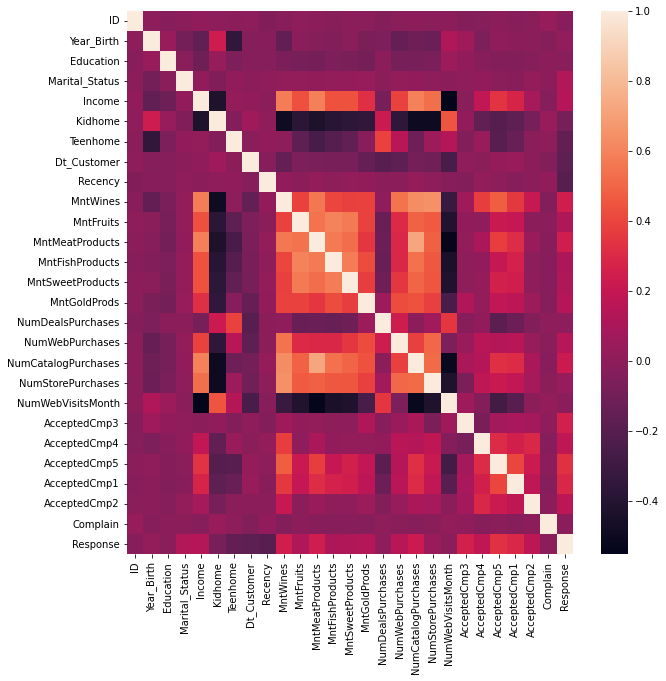

In [72]:
plt.figure(figsize = (10,10))
sns.heatmap(df_corr)

**<font color='blue'>2.a. Show the scatter plot between the MntWines and the Income features.**

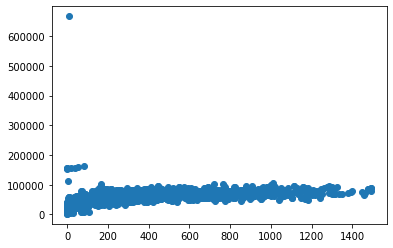

In [50]:
plt.scatter(df['MntWines'], df['Income'])

**<font color='blue'>2.b. Limit the y-axis to 200000 to remove the effect of the outlier**

*Tips: you can use the `plt.ylim()` function [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html)*

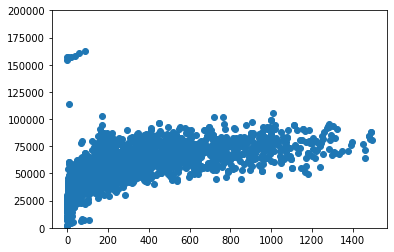

In [52]:
plt.ylim(0, 200000)
plt.scatter(df['MntWines'], df['Income'])

**<font color='blue'>2.c. Color the dots in the scatter plots using the Reponse categories.**

*Tips: The Response=0 dots should be in a different color than the Response=1 dots. you can use the c parameter of the .plot.scatter() function.*<br>

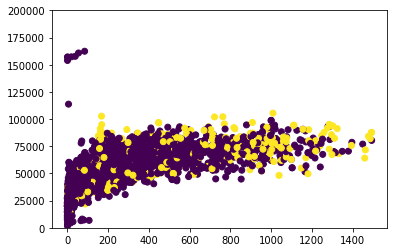

In [53]:
plt.ylim(0, 200000)
plt.scatter(df['MntWines'], df['Income'], c = df['Response'])

Pandas plotting functions, built on top of the Matplotlib library, provide a quick and easy way to generate simple plots, such as line, bar, and scatter plots, directly from a DataFrame or Series. These functions can be useful for quick exploratory data analysis or for generating basic visualizations for simple datasets. However, **Pandas plotting functions can be limited in their flexibility and customization options**, and they may not always produce the most aesthetically pleasing or informative plots.

On the other hand, Seaborn is a Python library that provides a higher-level interface for data visualization than Pandas. It is built on top of Matplotlib and offers a wide range of customizable, high-level visualizations, including heatmaps, violin plots, and faceted plots. **Seaborn's plots are often more visually appealing and informative than those generated by Pandas, and it provides advanced features such as built-in color palettes and statistical analysis capabilities**.

In summary:

*  **Use Pandas for generating quick and simple plots** 
*  **Use Seaborn for generating advanced plots**

In this case, I suggest you to use Seaborn for the scatter plot [Documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

**<font color='blue'>2.d. Add the NumCatalogPurchases to the previous scatter plot by modifying the size of the dots.**

*Tips: The higher is the NumCatalogPurchases feature, the bigger is the dot.*

<AxesSubplot:xlabel='MntWines', ylabel='Income'>

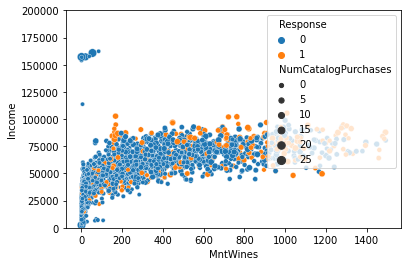

In [45]:
plt.ylim((0,200000))
sns.scatterplot(data = df, x = 'MntWines', y = 'Income', hue = 'Response', size = 'NumCatalogPurchases')

**<font color='blue'>3.a. Compute the means of the NumCatalogPurchases feature based on the Kidhome feature.<br>Comment the result.**

*Tips: There are three values for Kidhome, thus you should compute one average for each of these values.<br>You can use `groupby()` [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).*

In [46]:
df['NumCatalogPurchases'].groupby(df['Kidhome']).mean()

Kidhome
0    3.958237
1    0.902113
2    0.708333
Name: NumCatalogPurchases, dtype: float64

**<font color='blue'>3.b. Do the same but separate the Response=0 and Response=1 cases.<br>Are they different ? Comment.**

In [80]:
NP_K_R0 = df['NumCatalogPurchases'][df['Response'] == 0].groupby(df['Kidhome']).mean()
NP_K_R1 =df['NumCatalogPurchases'][df['Response'] == 1].groupby(df['Kidhome']).mean()
print('When Response = 0:\n{0}, \nwhen Response = 1:\n{1}'.format(NP_K_R0, NP_K_R1))


When Response = 0:
Kidhome
0    3.619048
1    0.826362
2    0.673913
Name: NumCatalogPurchases, dtype: float64, 
when Response = 1:
Kidhome
0    5.594595
1    1.445455
2    1.500000
Name: NumCatalogPurchases, dtype: float64


**<font color='blue'>4. Using the `catplot()` function from seaborn, display the relationship between the marital_status, the Kidhome and the Response variables in a bar plot.**

*Tips: The x, y, hue, col and kind parameters should be used inside of the catplot function.<br> The result should contain multiple bar plots.*

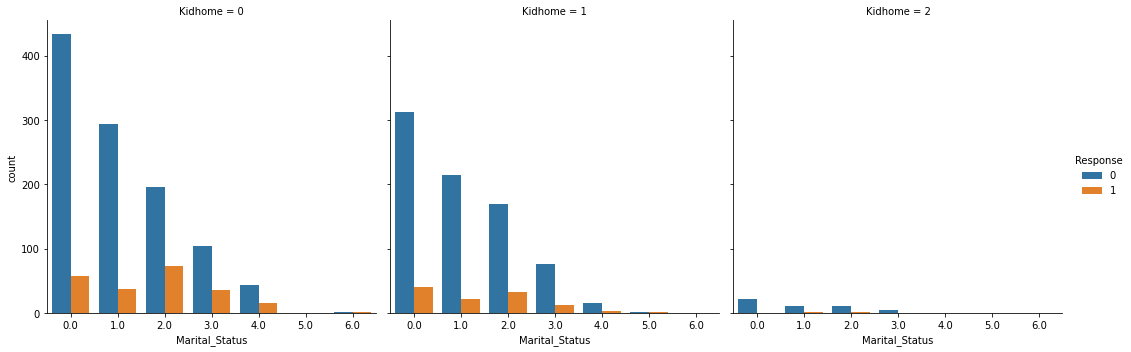

In [79]:
sns.catplot(data = df, x = 'Marital_Status', col = 'Kidhome', hue = 'Response', kind = 'count')